In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


./data/UNH_2006-01-01_to_2018-01-01.csv
./data/PFE_2006-01-01_to_2018-01-01.csv
./data/BA_2006-01-01_to_2018-01-01.csv
./data/stockprices.csv
./data/all_stocks_2006-01-01_to_2018-01-01.csv
./data/PG_2006-01-01_to_2018-01-01.csv
./data/MMM_2006-01-01_to_2018-01-01.csv
./data/JPM_2006-01-01_to_2018-01-01.csv
./data/AABA_2006-01-01_to_2018-01-01.csv
./data/CVX_2006-01-01_to_2018-01-01.csv
./data/all_stocks_2017-01-01_to_2018-01-01.csv
./data/UTX_2006-01-01_to_2018-01-01.csv
./data/AXP_2006-01-01_to_2018-01-01.csv
./data/GE_2006-01-01_to_2018-01-01.csv
./data/TRV_2006-01-01_to_2018-01-01.csv
./data/HD_2006-01-01_to_2018-01-01.csv
./data/MCD_2006-01-01_to_2018-01-01.csv
./data/XOM_2006-01-01_to_2018-01-01.csv
./data/VZ_2006-01-01_to_2018-01-01.csv
./data/DIS_2006-01-01_to_2018-01-01.csv
./data/CAT_2006-01-01_to_2018-01-01.csv
./data/CSCO_2006-01-01_to_2018-01-01.csv
./data/WMT_2006-01-01_to_2018-01-01.csv
./data/GOOGL_2006-01-01_to_2018-01-01.csv
./data/IBM_2006-01-01_to_2018-01-01.csv
./da

In [256]:
filepath = './data/stockprices.csv'
data = pd.read_csv(filepath)
# data = data.sort_values('Date')
data.tail()

,Date,Open,High,Low,Close,Voulme,Name
1757,23/12/2016,761.405639,763.355651,754.845641,757.445678,1945456.513,STOCKA
1758,27/12/2016,763.471812,774.721812,761.271800,771.471812,2628117.883,STOCKA
1759,28/12/2016,773.003504,776.753504,767.253504,768.883509,3246635.043,STOCKA
1760,29/12/2016,774.663623,775.663623,763.113575,767.413623,3176135.990,STOCKA
1761,30/12/2016,769.993017,770.923070,751.803075,753.393041,4160530.456,STOCKA


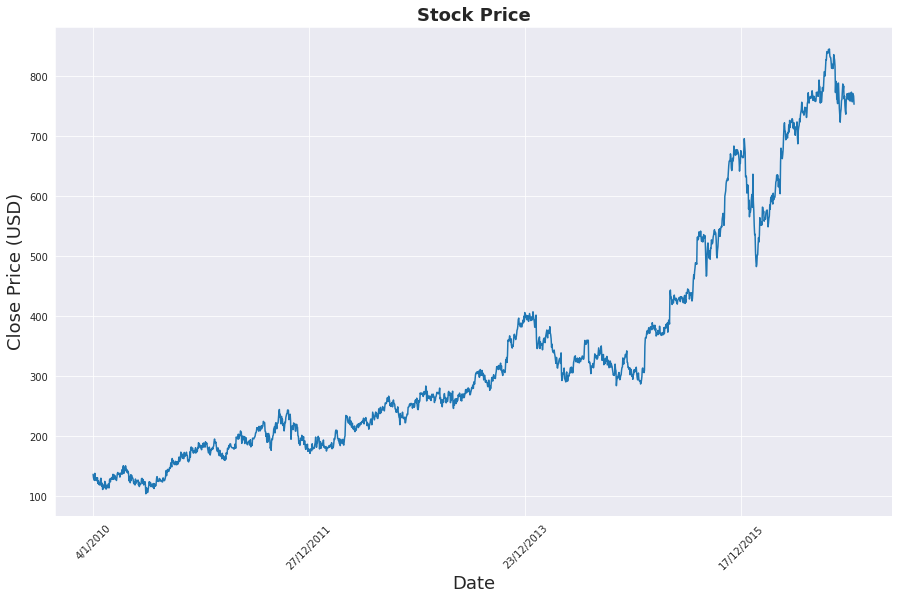

In [257]:
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [258]:
price = data[['Close']]
# print(pd.__version__)
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1762 non-null   float64
dtypes: float64(1)
memory usage: 13.9 KB


In [259]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [260]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 

        data.append(data_raw[index: index + lookback])
        
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [261]:
lookback = 5 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1406, 4, 1)
y_train.shape =  (1406, 1)
x_test.shape =  (351, 4, 1)
y_test.shape =  (351, 1)


In [262]:
price.to_numpy()[0:5]

array([[-0.91248866],
       [-0.92933727],
       [-0.9320509 ],
       [-0.94002002],
       [-0.90824265]])

In [263]:
x_train[0]

array([[-0.91248866],
       [-0.92933727],
       [-0.9320509 ],
       [-0.94002002]])

In [264]:
y_train[0]

array([-0.90824265])

In [265]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [266]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [267]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [268]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [269]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.2591339945793152
Epoch  1 MSE:  0.16240976750850677
Epoch  2 MSE:  0.08716018497943878
Epoch  3 MSE:  0.0518285296857357
Epoch  4 MSE:  0.09909763187170029
Epoch  5 MSE:  0.08343753963708878
Epoch  6 MSE:  0.05724095553159714
Epoch  7 MSE:  0.051209185272455215
Epoch  8 MSE:  0.05679319053888321
Epoch  9 MSE:  0.06303510814905167
Epoch  10 MSE:  0.06540185958147049
Epoch  11 MSE:  0.06350964307785034
Epoch  12 MSE:  0.058682069182395935
Epoch  13 MSE:  0.05283370986580849
Epoch  14 MSE:  0.04798935353755951
Epoch  15 MSE:  0.04578271135687828
Epoch  16 MSE:  0.04661576449871063
Epoch  17 MSE:  0.04890308901667595
Epoch  18 MSE:  0.04981411248445511
Epoch  19 MSE:  0.04778119921684265
Epoch  20 MSE:  0.043835610151290894
Epoch  21 MSE:  0.04014201834797859
Epoch  22 MSE:  0.03799136355519295
Epoch  23 MSE:  0.037213198840618134
Epoch  24 MSE:  0.03676113486289978
Epoch  25 MSE:  0.03551385924220085
Epoch  26 MSE:  0.032823532819747925
Epoch  27 MSE:  0.02881004847586155

In [270]:
print(type(y_train_pred))

<class 'torch.Tensor'>


In [249]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))


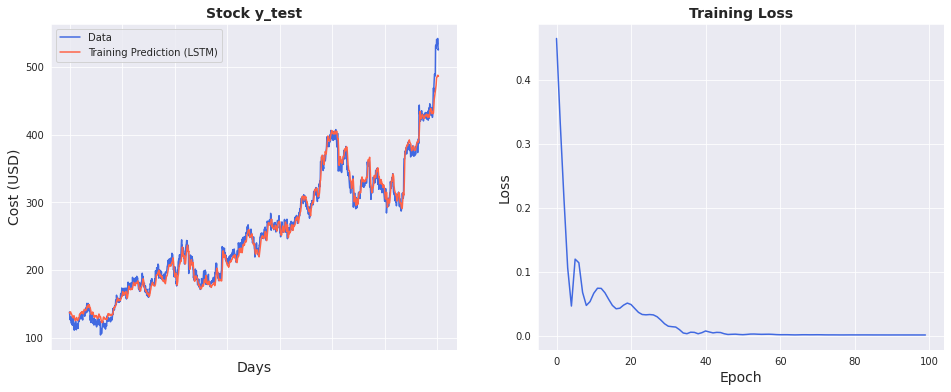

In [250]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock y_test', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [251]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 10.98 RMSE
Test Score: 172.67 RMSE


In [230]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [231]:
date=data['Date']]
data

SyntaxError: invalid syntax (<ipython-input-231-bb2aea0ee6c6>, line 1)

In [232]:
# !pip install nbformat
# !pip install plotly
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [233]:
# !pip install chart-studio

In [234]:
import chart_studio.plotly as py
import chart_studio

chart_studio.tools.set_credentials_file(username='awsryanlee', api_key='n9L15EdJiAQ6EAf2blmi')
py.iplot(fig, filename='stock_prediction_lstm')

In [195]:
!pip freeze > requirements.txt